In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
#Task 1: Mean, Median and Mode

In [3]:
admissions = [32, 28, 35, 30, 29, 27, 31, 34, 33, 30]
mean_admissions = np.mean(admissions)
median_admissions = np.median(admissions)
mode_admissions = Counter(admissions).most_common()
mode_values_admissions = [k for k, v in mode_admissions if v == mode_admissions[0][1]]

In [4]:
mean_admissions , median_admissions 

(30.9, 30.5)

In [5]:
mode_values_admissions

[30]

In [12]:
# Increase capacity by 10%
increased_admissions = [int(x * 1.1) for x in admissions]

# Recompute measures after increase
mean_increased = np.mean(increased_admissions)
median_increased = np.median(increased_admissions)

# Compute new mode
mode_increased = Counter(increased_admissions).most_common()
mode_values_increased = [k for k, v in mode_increased if v == mode_increased[0][1]]


# Display results
df = pd.DataFrame({
    "Measure": ["Mean", "Median", "Mode"],
    "Original Value": [mean_admissions, median_admissions, mode_values_admissions],
    "After 10% Increase": [mean_increased, median_increased, mode_values_increased]
})

df

,Measure,Original Value,After 10% Increase
0,Mean,30.9,33.6
1,Median,30.5,33.5
2,Mode,[30],[33]


In [ ]:
#Task 2: Range, Variance and Standard Deviation

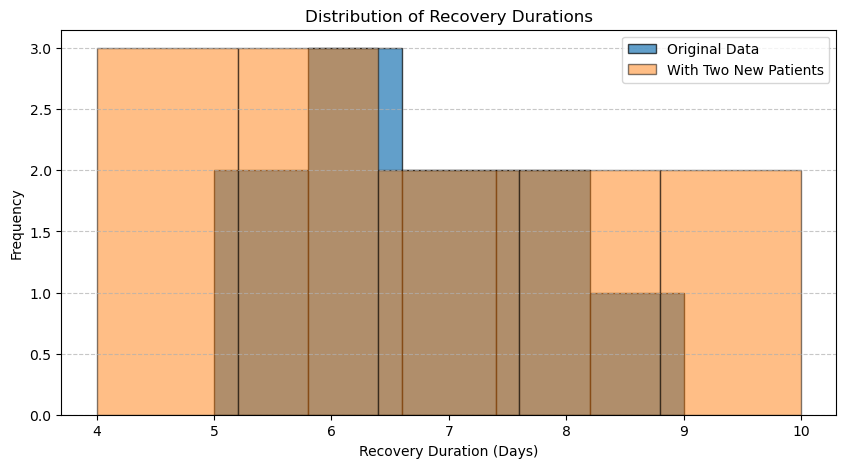

({'Range': 4, 'Variance': 1.61, 'Std Deviation': 1.2688577540449522},
 {'New Range': 6,
  'New Variance': 2.8541666666666665,
  'New Std Deviation': 1.689427911059441})

In [10]:
recovery_days = [5, 7, 6, 8, 9, 5, 6, 7, 8, 6]
# Compute range, variance and standard deviation
range_recovery = max(recovery_days) - min(recovery_days)
variance_recovery = np.var(recovery_days, ddof=0)  
std_dev_recovery = np.std(recovery_days, ddof=0)   

results={
    "Range":range_recovery,
    "Variance":variance_recovery,
    "Std Deviation":std_dev_recovery
}

# Adding two new patients with recovery times of 4 and 10 days
updated_recovery_days = recovery_days + [4, 10]

# Compute new Range, Variance and standard deviation

range_updated = max(updated_recovery_days) - min(updated_recovery_days)
variance_updated = np.var(updated_recovery_days, ddof=0)
std_dev_updated = np.std(updated_recovery_days, ddof=0)  # Population standard deviation

new_results={
    "New Range":range_updated,
    "New Variance":variance_updated,
    "New Std Deviation":std_dev_updated
}
plt.figure(figsize=(10, 5))
plt.hist(recovery_days, bins=5, alpha=0.7, label="Original Data", edgecolor="black")
plt.hist(updated_recovery_days, bins=5, alpha=0.5, label="With Two New Patients", edgecolor="black")

plt.xlabel("Recovery Duration (Days)")
plt.ylabel("Frequency")
plt.title("Distribution of Recovery Durations")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

results, new_results


In [ ]:
#Task 3: Skewness and Kurtosis

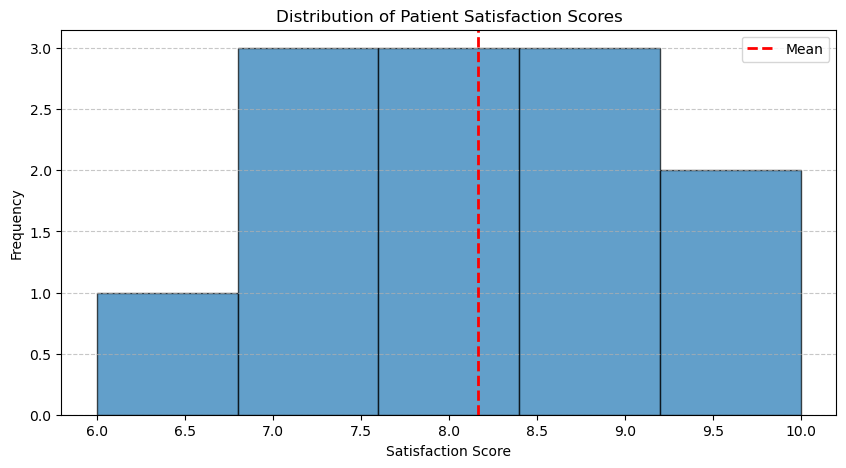

,Measure,Value
0,Skewness,-0.041467
1,Kurtosis,-1.014596


In [14]:
from scipy.stats import skew, kurtosis
satisfaction_scores = [8, 9, 7, 8, 10, 7, 9, 6, 10, 8, 7, 9]
skewness = skew(satisfaction_scores)
kurtosis_value = kurtosis(satisfaction_scores, fisher=True)  
plt.figure(figsize=(10, 5))
plt.hist(satisfaction_scores, bins=5, edgecolor='black', alpha=0.7)
plt.axvline(np.mean(satisfaction_scores), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.xlabel("Satisfaction Score")
plt.ylabel("Frequency")
plt.title("Distribution of Patient Satisfaction Scores")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


df_satisfaction = pd.DataFrame({
    "Measure": ["Skewness", "Kurtosis"],
    "Value": [skewness, kurtosis_value]
})

df_satisfaction

In [ ]:
#Task 4: Correlation coefficient

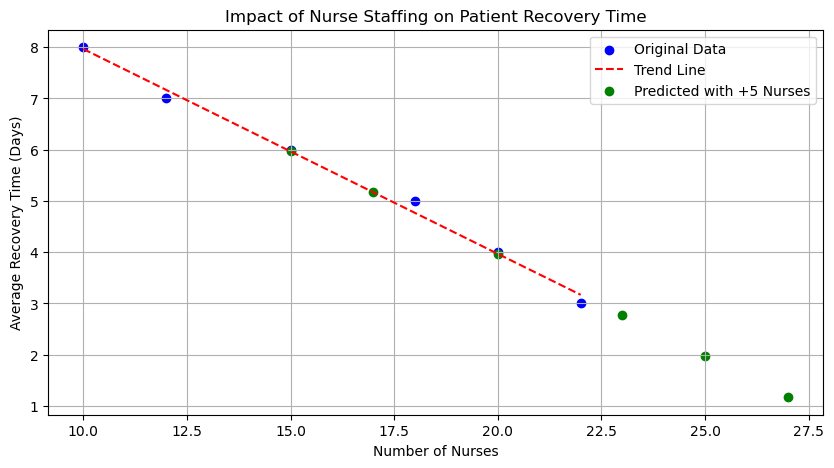

(                   Measure     Value
 0  Correlation Coefficient -0.996757,
    Number of Nurses  Predicted Recovery Time (Days)
 0                15                        5.966309
 1                17                        5.166922
 2                20                        3.967841
 3                23                        2.768760
 4                25                        1.969372
 5                27                        1.169985)

In [16]:
from scipy.stats import pearsonr
nurses = np.array([10, 12, 15, 18, 20, 22])
recovery_time = np.array([8, 7, 6, 5, 4, 3])

correlation_coefficient, _ = pearsonr(nurses, recovery_time)
increased_nurses = nurses + 5
slope, intercept = np.polyfit(nurses, recovery_time, 1)
predicted_recovery_time = slope * increased_nurses + intercept
plt.figure(figsize=(10, 5))
plt.scatter(nurses, recovery_time, color='blue', label="Original Data")
plt.plot(nurses, slope * nurses + intercept, linestyle="dashed", color='red', label="Trend Line")
plt.scatter(increased_nurses, predicted_recovery_time, color='green', label="Predicted with +5 Nurses")

plt.xlabel("Number of Nurses")
plt.ylabel("Average Recovery Time (Days)")
plt.title("Impact of Nurse Staffing on Patient Recovery Time")
plt.legend()
plt.grid(True)
plt.show()


df_correlation = pd.DataFrame({
    "Measure": ["Correlation Coefficient"],
    "Value": [correlation_coefficient]
})

df_predicted = pd.DataFrame({
    "Number of Nurses": increased_nurses,
    "Predicted Recovery Time (Days)": predicted_recovery_time
})

df_correlation, df_predicted

In [ ]:
#Task 5: Null and alternative Hypothesis

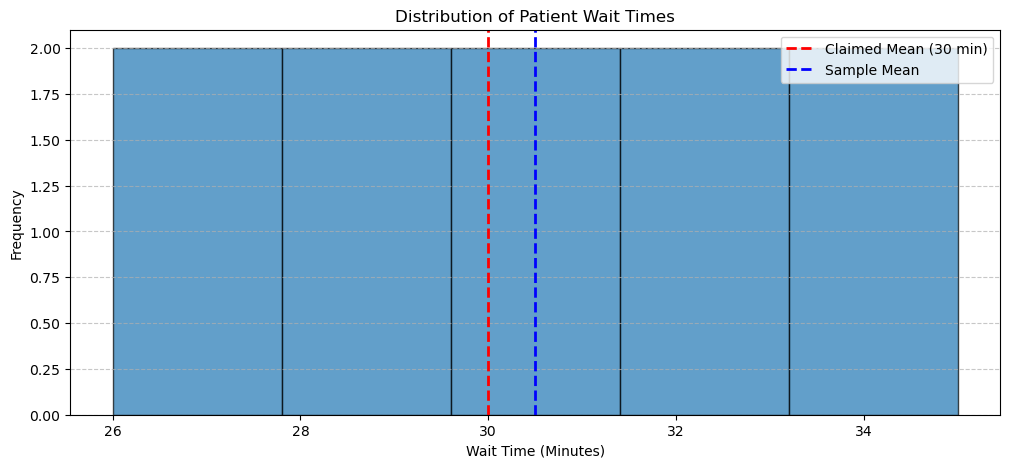

,Statistic,Value
0,T-Statistic,0.522233
1,P-Value,0.614117


In [20]:
from scipy.stats import ttest_1samp
wait_times = np.array([32, 29, 31, 34, 33, 27, 30, 28, 35, 26])
claimed_mean = 30
t_stat, p_value = ttest_1samp(wait_times, claimed_mean)
plt.figure(figsize=(12, 5))
plt.hist(wait_times, bins=5, edgecolor='black', alpha=0.7)
plt.axvline(claimed_mean, color='red', linestyle='dashed', linewidth=2, label="Claimed Mean (30 min)")
plt.axvline(np.mean(wait_times), color='blue', linestyle='dashed', linewidth=2, label="Sample Mean")
plt.xlabel("Wait Time (Minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Patient Wait Times")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

df_test_results = pd.DataFrame({
    "Statistic": ["T-Statistic", "P-Value"],
    "Value": [t_stat, p_value]
})

df_test_results

In [ ]:
#Task 6: Hospital Cleanliness

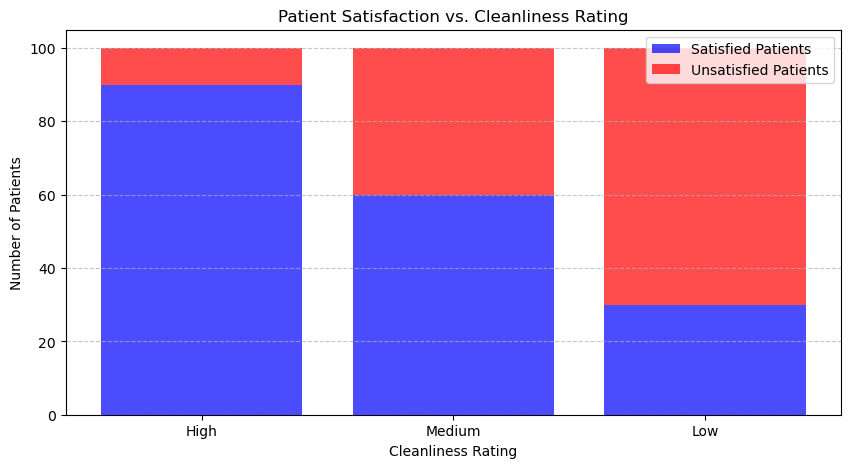

,Statistic,Value
0,Chi-Square Statistic,7.500000e+01
1,P-Value,5.175555e-17
2,Degrees of Freedom,2.000000e+00


In [22]:
from scipy.stats import chi2_contingency
contingency_table = np.array([[90, 10], [60, 40], [30, 70]])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
categories = ["High", "Medium", "Low"]
satisfied = [90, 60, 30]
unsatisfied = [10, 40, 70]

x = np.arange(len(categories))  # Label locations

plt.figure(figsize=(10, 5))
plt.bar(x, satisfied, label="Satisfied Patients", color="blue", alpha=0.7)
plt.bar(x, unsatisfied, bottom=satisfied, label="Unsatisfied Patients", color="red", alpha=0.7)

plt.xticks(x, categories)
plt.xlabel("Cleanliness Rating")
plt.ylabel("Number of Patients")
plt.title("Patient Satisfaction vs. Cleanliness Rating")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
df_chi2_results = pd.DataFrame({
    "Statistic": ["Chi-Square Statistic", "P-Value", "Degrees of Freedom"],
    "Value": [chi2_stat, p_value, dof]
})

df_chi2_results

In [ ]:
#Task 7: Null and alternative hypotheses

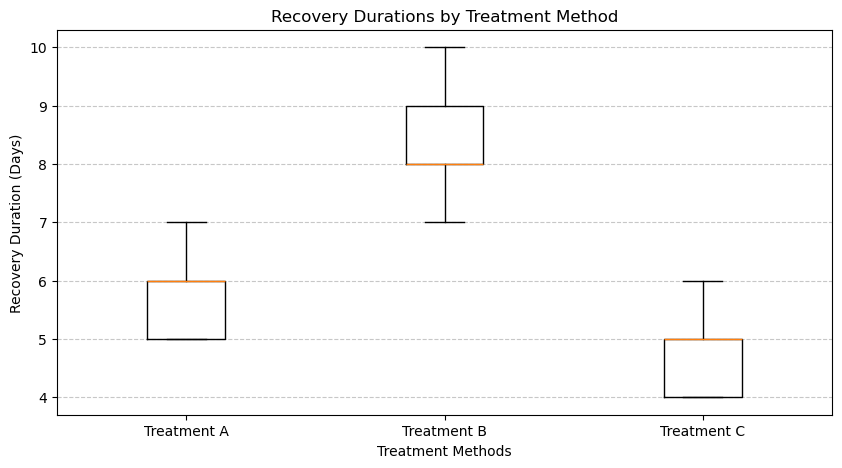

,Statistic,Value
0,F-Statistic,19.185185
1,P-Value,0.000183


In [26]:
from scipy.stats import f_oneway

treatment_A = [5, 6, 7, 5, 6]
treatment_B = [8, 9, 7, 8, 10]
treatment_C = [4, 5, 6, 5, 4]

f_statistic, p_value = f_oneway(treatment_A, treatment_B, treatment_C)

plt.figure(figsize=(10, 5))
plt.boxplot([treatment_A, treatment_B, treatment_C], tick_labels=["Treatment A", "Treatment B", "Treatment C"])
plt.xlabel("Treatment Methods")
plt.ylabel("Recovery Duration (Days)")
plt.title("Recovery Durations by Treatment Method")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

df_anova_results = pd.DataFrame({
    "Statistic": ["F-Statistic", "P-Value"],
    "Value": [f_statistic, p_value]
})

df_anova_results



In [ ]:
#Task 8: Hospital administration time

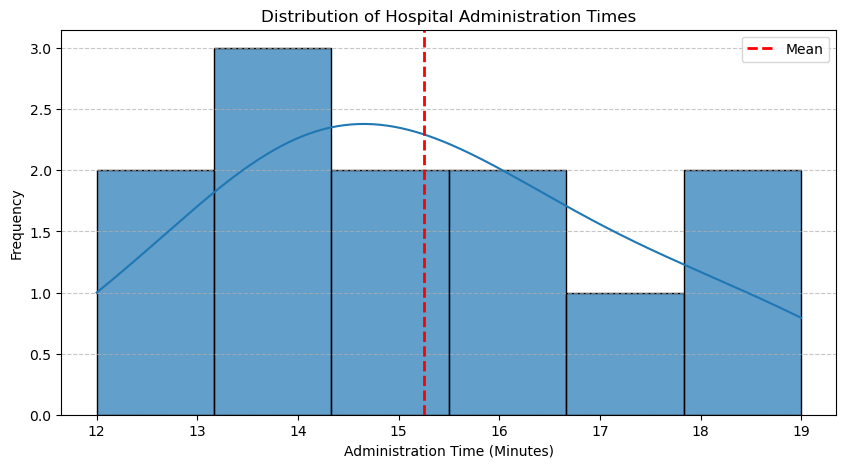

,Statistic,Value
0,Shapiro-Wilk Test Statistic,0.970912
1,P-Value,0.920121


In [28]:
from scipy.stats import shapiro
import seaborn as sns

admin_times = [12, 15, 14, 16, 18, 13, 14, 17, 15, 19, 16, 14]
shapiro_stat, p_value = shapiro(admin_times)
plt.figure(figsize=(10, 5))
sns.histplot(admin_times, bins=6, kde=True, edgecolor='black', alpha=0.7)
plt.axvline(np.mean(admin_times), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.xlabel("Administration Time (Minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Hospital Administration Times")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

df_normality_results = pd.DataFrame({
    "Statistic": ["Shapiro-Wilk Test Statistic", "P-Value"],
    "Value": [shapiro_stat, p_value]
})

df_normality_results

In [ ]:
#Task 9: Probability distribution.

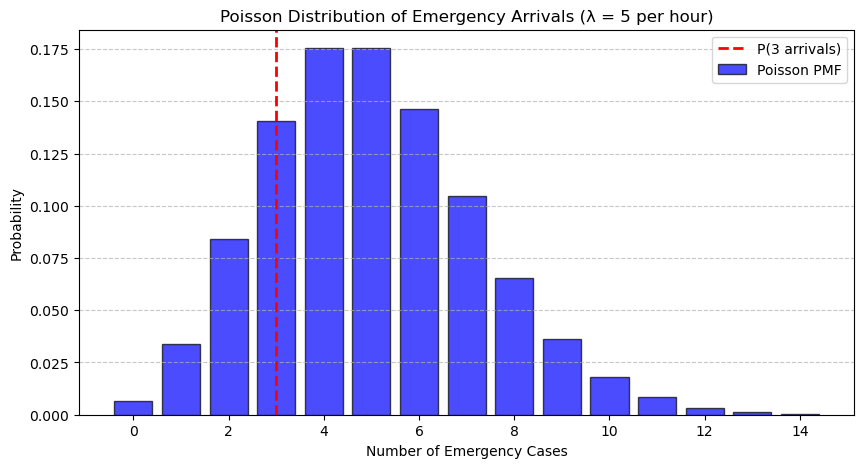

,Scenario,Value
0,Probability of Exactly 3 Arrivals,0.140374


In [30]:
from scipy.stats import poisson

lambda_rate = 5  # Average rate of emergency arrivals per hour
k = 3  # Number of arrivals we want to find probability for

probability_3_arrivals = poisson.pmf(k, lambda_rate)

x_values = np.arange(0, 15)  # Possible arrival values
y_values = poisson.pmf(x_values, lambda_rate)

plt.figure(figsize=(10, 5))
plt.bar(x_values, y_values, alpha=0.7, color='blue', edgecolor='black', label="Poisson PMF")
plt.axvline(k, color='red', linestyle='dashed', linewidth=2, label="P(3 arrivals)")

plt.xlabel("Number of Emergency Cases")
plt.ylabel("Probability")
plt.title("Poisson Distribution of Emergency Arrivals (λ = 5 per hour)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

df_poisson_results = pd.DataFrame({
    "Scenario": ["Probability of Exactly 3 Arrivals"],
    "Value": [probability_3_arrivals]
})

df_poisson_results

In [ ]:
#Task 10: type of probability distribution

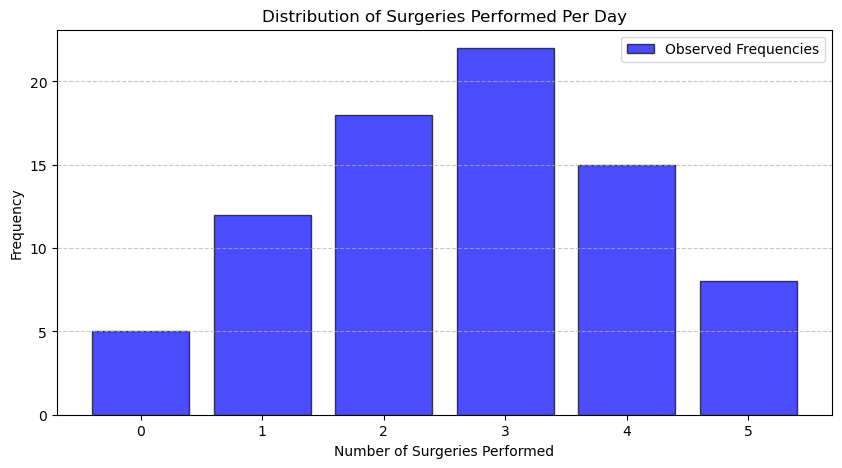

,Measure,Value
0,Expected Surgeries Per Day,2.675


In [34]:
surgeries = np.array([0, 1, 2, 3, 4, 5])
frequencies = np.array([5, 12, 18, 22, 15, 8])
total_observations = np.sum(frequencies)

# Compute expected number of surgeries per day (mean of distribution)
expected_surgeries = np.sum(surgeries * frequencies) / total_observations

# Visualization: Bar Chart of Surgery Frequencies
plt.figure(figsize=(10, 5))
plt.bar(surgeries, frequencies, alpha=0.7, color='blue', edgecolor='black', label="Observed Frequencies")
plt.xlabel("Number of Surgeries Performed")
plt.ylabel("Frequency")
plt.title("Distribution of Surgeries Performed Per Day")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Display results
df_surgery_analysis = pd.DataFrame({
    "Measure": ["Expected Surgeries Per Day"],
    "Value": [expected_surgeries]
})

df_surgery_analysis